In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install wordcloud
from wordcloud import WordCloud

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('drive/My Drive/DatasetNlp/cleaned_tweets.csv')


In [0]:
df.shape

(28992, 6)

In [0]:
df.Source.unique()

array(['depressingmsgs', 'combined_tweets_gargi', 'dataset3_abhiraj',
       'dataset2_abhiraj', 'cuttingquotes', nan, 'sentiment140',
       'dataset1_abhiraj', 'manually_annotated', 'depressed1278',
       'mhtodaymag', 'quotesdepress', 'saddpquotes', 'suicidalconcept',
       'togethermw', 'waybeyondbroken'], dtype=object)

In [0]:
df = df[df.Source.notna()]

In [0]:
sources_to_keep = ['depressingmsgs', 'cuttingquotes', 'sentiment140', 'togethermw']
sources_not_to_keep = ['dataset1_abhiraj', 'dataset2_abhiraj', 'dataset3_abhiraj']

df = df[df.Cleaned != 'None']
df = df[~df.Source.isin(sources_not_to_keep)]
#df = df[df.Source!=sources_not_to_keep]

df = df.sample(frac=1).reset_index(drop=True)

In [0]:
df.Source.unique()

array(['depressingmsgs', 'mhtodaymag', 'combined_tweets_gargi',
       'sentiment140', 'manually_annotated', 'togethermw',
       'cuttingquotes', 'suicidalconcept', 'depressed1278',
       'waybeyondbroken', 'saddpquotes', 'quotesdepress'], dtype=object)

In [0]:
df.dropna(inplace=True)

In [0]:
depressive_tweets = [df[df.Target == 1].Cleaned]
depressive_words = ' '.join(list(map(str, depressive_tweets)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

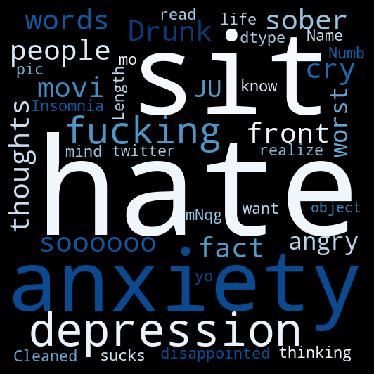

In [0]:
plt.figure(figsize = (8, 5), facecolor = 'black')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [0]:
depressive_wc.words_

{'Cleaned': 0.3333333333333333,
 'Drunk': 0.3333333333333333,
 'Insomnia': 0.3333333333333333,
 'JU': 0.3333333333333333,
 'Length': 0.3333333333333333,
 'Name': 0.3333333333333333,
 'Numb': 0.3333333333333333,
 'angry': 0.3333333333333333,
 'anxiety': 0.6666666666666666,
 'cry': 0.3333333333333333,
 'depression': 0.6666666666666666,
 'disappointed': 0.3333333333333333,
 'dtype': 0.3333333333333333,
 'fact': 0.3333333333333333,
 'front': 0.3333333333333333,
 'fucking': 0.6666666666666666,
 'hate': 1.0,
 'know': 0.3333333333333333,
 'life': 0.3333333333333333,
 'mNqg': 0.3333333333333333,
 'mind': 0.3333333333333333,
 'mo': 0.3333333333333333,
 'movi': 0.3333333333333333,
 'object': 0.3333333333333333,
 'people': 0.3333333333333333,
 'pic': 0.3333333333333333,
 'read': 0.3333333333333333,
 'realize': 0.3333333333333333,
 'sit': 0.6666666666666666,
 'sober': 0.3333333333333333,
 'soooooo': 0.3333333333333333,
 'sucks': 0.3333333333333333,
 'thinking': 0.3333333333333333,
 'thoughts': 0.3

In [0]:
wordListWithKeyAndValue = sorted(depressive_wc.words_.items(), key=lambda x: x[1],reverse=True)[:10]

In [0]:
wordList = [i[0] for i in wordListWithKeyAndValue]

In [0]:
wordList

['hate',
 'sit',
 'anxiety',
 'depression',
 'fucking',
 'people',
 'front',
 'movi',
 'soooooo',
 'Drunk']

In [0]:
countOfFalsePositives = 0;
countOfFalseNegatives = 0;
for index,row in df.iterrows():
  if any(ext in row['Cleaned'] for ext in wordList):
    if row['Target'] == 0.0:
      countOfFalsePositives+=1
  else:
    if row['Target'] == 1.0:
      countOfFalseNegatives+=1

In [0]:
df.columns

Index(['Unnamed: 0', 'Tweet', 'Target', 'Source', 'Cleaned',
       'Cleaned_stop_words'],
      dtype='object')

In [0]:
accuracy = (df.shape[0] - countOfFalseNegatives - countOfFalsePositives) / df.shape[0]

In [0]:
accuracy

0.648561523021714